In [11]:
import sys 
import os
module_path = '/home/m/m300872/warm_eurec4a/submodules/'
if not module_path in sys.path: sys.path.append(module_path)

import file_handling as fh

data = fh.disk_data_from_keywords('/scratch/m/m300872/temp', ['pp3'])
data = data.sel({'is_ice_cloud':0})
data

<xarray.Dataset> Size: 1MB
Dimensions:        (is_cloud: 3, experiment: 2, time: 2411)
Coordinates:
  * experiment     (experiment) <U7 56B 'control' 'warming'
  * is_cloud       (is_cloud) float64 24B 0.0 1.0 nan
    is_ice_cloud   float64 8B 0.0
  * time           (time) datetime64[ns] 19kB 2020-01-09T06:00:00 ... 2020-01...
Data variables: (12/23)
    t_2m           (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    u_10m          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    rh_2m          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    sob_t          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    v_10m          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    sou_t          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    ...             ...
    tqc_dia        (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    sod_t          (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    albedo         (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    SW_budget      (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    rad_budget     (is_cloud, experiment, time) float32 58kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
    tqi_dia>1e-05  (is_cloud, experiment, time) float64 116kB dask.array<chunksize=(3, 2, 2), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               icon\tgit@gitlab.dkrz.de:icon/icon.git@e8171c42bcd2...
    history:              /work/mh1126/m300872/icon_haukestate/bin/icon-e8171...
    references:           see MPIM/DWD publications
    comment:              Hernan Campos (m300872) on l30293 (Linux 4.18.0-425...

In [13]:
cre = data.sel({'is_cloud':None}) - data.sel({'is_cloud':1})
cre

<xarray.Dataset> Size: 482kB
Dimensions:        (experiment: 2, time: 2411)
Coordinates:
  * experiment     (experiment) <U7 56B 'control' 'warming'
    is_ice_cloud   float64 8B 0.0
  * time           (time) datetime64[ns] 19kB 2020-01-09T06:00:00 ... 2020-01...
Data variables: (12/23)
    t_2m           (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    u_10m          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    rh_2m          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    sob_t          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    v_10m          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    sou_t          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    ...             ...
    tqc_dia        (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    sod_t          (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    albedo         (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    SW_budget      (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    rad_budget     (experiment, time) float32 19kB dask.array<chunksize=(2, 2), meta=np.ndarray>
    tqi_dia>1e-05  (experiment, time) float64 39kB dask.array<chunksize=(2, 2), meta=np.ndarray>

$\bar{F_{AS}}$ 6.5030727
$\bar{F_{CL}}$ -6.593358
$\bar{F_{CS}}$ 12.205658
$(\bar{F_{CL}} \cdot clct) + (\bar{F_{CS}} \cdot (1 - clct))$ 5.7277536


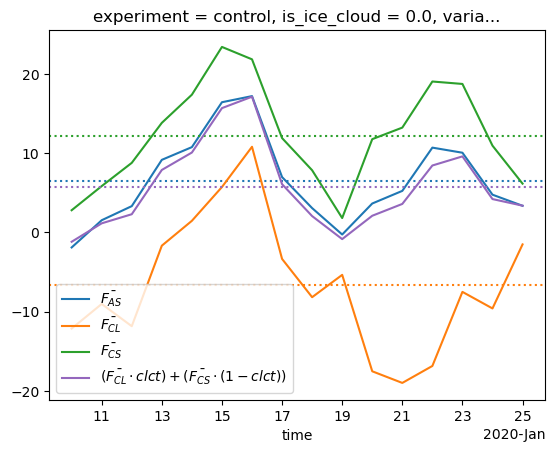

In [37]:
import postprocessing as pp
import matplotlib.pyplot as plt

data = fh.disk_data_from_keywords('/scratch/m/m300872/temp', ['pp3'])
data = data.sel({'is_ice_cloud':0})
data = pp.daily_average(data)
data = data.where((data['samples_per_day'] > 140).compute(), drop=True)

fas1 = data.sel({'experiment':'control', 'is_cloud':None})['rad_budget']
clct = data.sel({'experiment':'control', 'is_cloud':None})['clct'] / 100
fcl  = data.sel({'experiment':'control', 'is_cloud':1})['rad_budget']
fcs  = data.sel({'experiment':'control', 'is_cloud':0})['rad_budget']
fas2 = fcl * clct + fcs * (1 - clct)

fig, ax = plt.subplots()
for var, label, color in zip([fas1, fcl, fcs, fas2], 
                             ['$\\bar{F_{AS}}$', '$\\bar{F_{CL}}$', '$\\bar{F_{CS}}$', '$(\\bar{F_{CL}} \\cdot clct) + (\\bar{F_{CS}} \\cdot (1 - clct))$'], 
                             ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']):
    var.plot(ax=ax, color=color, label=label)
    mean = var.mean(dim='time')
    print(label, mean.values)
    ax.axhline(mean, ls=':', color=color)
ax.legend()
fig.show()

$$
CRE = \bar{F_{AS}} - \bar{F_{CL}}
$$

$$
\bar{F_{AS}} = (\bar{F_{CL}} \cdot clct) - (\bar{F_{CS}} \cdot (1 - clct))
$$ 

Substitute II into I

$$
CRE = \left((\bar{F_{CL}} \cdot clct) - (\bar{F_{CS}} \cdot (1 - clct))\right) - \bar{F_{CL}}
$$

rearrange parenthesis


$$
CRE = \bar{F_{CL}} \cdot clct - \bar{F_{CL}} - \bar{F_{CS}} \cdot (1 - clct)
$$

$$
CRE = \bar{F_{CL}}(clct - 1) - \bar{F_{CS}} \cdot (1 - clct)
$$


Notice that $(clct - 1) = (-(1 - clct))$

$$
CRE = -\bar{F_{CL}}(1 - clct) - \bar{F_{CS}}(1 - clct)
$$

$$
CRE = -(1 - clct)(\bar{F_{CL}} + \bar{F_{CS}})
$$

$$
CRE = (clct - 1)(\bar{F_{CL}} + \bar{F_{CS}})
$$

$$
CRE = clct \cdot \bar{F_{CL}} - \bar{F_{CL}} + clct \cdot \bar{F_{CS}} - \bar{F_{CS}}
$$